## **Importing Libraries**

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [255]:
df_train=pd.read_csv('/content/SalaryData_Train.csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [256]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

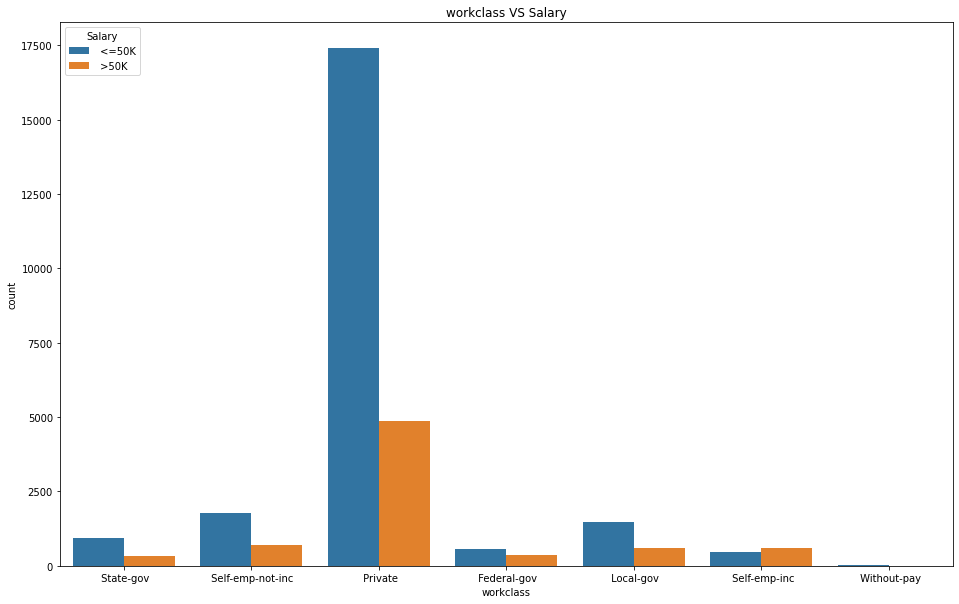

In [257]:
import seaborn as sns
plt.figure(figsize=(16,10))
plt.title("workclass VS Salary")
sns.countplot(x='workclass',hue='Salary',data=df_train)

**Data preprocessing**

In [258]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_train["workclass"]=encoder.fit_transform(df_train['workclass'])#<=50k means 0 #>50k means 1
df_train["education"]=encoder.fit_transform(df_train['education'])
df_train["maritalstatus"]=encoder.fit_transform(df_train['maritalstatus'])
df_train["occupation"]=encoder.fit_transform(df_train['occupation'])
df_train["relationship"]=encoder.fit_transform(df_train['relationship'])
df_train["salary_"]=encoder.fit_transform(df_train['Salary'])
df_train["native"]=encoder.fit_transform(df_train['native'])
df_train["sex"]=encoder.fit_transform(df_train['sex'])
df_train["race"]=encoder.fit_transform(df_train['race'])

In [259]:
df_train.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,salary_
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K,0


In [260]:
df_train.drop(['Salary'],axis='columns',inplace=True)

## **Applying PCA**

In [261]:
from sklearn.preprocessing import scale
arry=scale(df_train.values)
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca_train_values=pca.fit_transform(arry)
pca_train_values

array([[ 0.38547497, -0.02641989, -0.85515942, -0.69894951,  1.32975596,
        -0.54338494],
       [ 0.42062117, -0.3329443 , -0.25399421, -1.14126287,  0.83369308,
         0.28721705],
       [ 0.4934446 , -0.6964976 , -0.05047269, -1.07243835, -0.01266733,
        -0.4506151 ],
       ...,
       [-1.99584077,  0.78544638,  0.55842785, -1.12931283,  0.16329233,
        -0.00556773],
       [-1.87825439, -0.0042088 , -1.01640578, -0.5131801 ,  0.06580045,
        -0.6482653 ],
       [-0.12844668,  1.6535163 ,  2.05036756, -1.18612829,  1.56592654,
         1.29160034]])

In [262]:
variance=pca.explained_variance_ratio_
var1=np.cumsum(np.round(variance,decimals=4)*100)
var1

array([16.94, 27.25, 35.4 , 43.33, 50.73, 57.93])

In [263]:
finaltrain = pd.DataFrame(pca_train_values[:,0:4])
                     
finaltrain

,0,1,2,3
0,0.385475,-0.026420,-0.855159,-0.698950
1,0.420621,-0.332944,-0.253994,-1.141263
2,0.493445,-0.696498,-0.050473,-1.072438
3,-0.133454,-2.732701,1.364716,0.183408
4,-2.318926,0.565513,3.520603,3.255059
...,...,...,...,...
30156,-1.860126,1.199083,-0.016109,0.151856
30157,1.423750,-0.384857,-0.203791,-0.136161
30158,-1.995841,0.785446,0.558428,-1.129313
30159,-1.878254,-0.004209,-1.016406,-0.513180


In [264]:
X=finaltrain
Y=df_train["salary_"]

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [267]:
df_test=pd.read_csv('/content/SalaryData_Test.csv')

In [268]:
df_test.drop(['race'],axis='columns',inplace=True)

In [269]:
df_test.drop_duplicates(inplace=True)

In [270]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_test["workclass"]=encoder.fit_transform(df_test['workclass'])#<=50k means 0 #>50k means 1
df_test["education"]=encoder.fit_transform(df_test['education'])
df_test["maritalstatus"]=encoder.fit_transform(df_test['maritalstatus'])
df_test["occupation"]=encoder.fit_transform(df_test['occupation'])
df_test["relationship"]=encoder.fit_transform(df_test['relationship'])
df_test["salary_"]=encoder.fit_transform(df_test['Salary'])
df_test["native"]=encoder.fit_transform(df_test['native'])
df_test["sex"]=encoder.fit_transform(df_test['sex'])

In [271]:
df_test.drop(['Salary'],axis='columns',inplace=True)

In [272]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,native,salary_
0,25,2,1,7,4,6,3,1,0,0,40,37,0
1,38,2,11,9,2,4,0,1,0,0,50,37,0
2,28,1,7,12,2,10,0,1,0,0,40,37,1
3,44,2,15,10,2,6,0,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,1,0,0,30,37,0


In [273]:
from sklearn.preprocessing import scale
arry=scale(df_test.values)
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca_train_values=pca.fit_transform(arry)
pca_train_values

array([[-1.75997285, -1.79197906, -0.69452675,  0.54590908,  0.44962634,
        -0.14015087],
       [ 0.56780901, -0.84017555, -0.33535852, -0.32337016, -0.68065354,
        -0.90318673],
       [ 1.24754579, -0.09809724, -1.14599386,  0.31428583,  1.10354048,
        -0.39385428],
       ...,
       [ 1.00573796, -0.18533843, -0.92900863,  0.02725384, -0.37122648,
         0.05302937],
       [ 0.32408218,  0.37307422,  1.38946207, -0.18262866, -0.42120065,
        -1.15513192],
       [ 2.21088055,  0.14053496, -0.26901844,  0.05643127, -0.41888329,
        -0.56527481]])

In [274]:
variance=pca.explained_variance_ratio_
var1=np.cumsum(np.round(variance,decimals=4)*100)
var1

array([17.65, 28.96, 37.49, 45.47, 53.33, 61.08])

In [275]:
finaltest = pd.DataFrame(pca_train_values[:,0:4])
                     
finaltest

,0,1,2,3
0,-1.759973,-1.791979,-0.694527,0.545909
1,0.567809,-0.840176,-0.335359,-0.323370
2,1.247546,-0.098097,-1.145994,0.314286
3,1.881127,0.515449,0.049408,0.452699
4,-1.399762,-2.589909,-0.503390,0.526792
...,...,...,...,...
13937,-0.616487,0.571594,-1.228416,0.362502
13938,-0.119612,0.808474,0.805348,-0.215816
13939,1.005738,-0.185338,-0.929009,0.027254
13940,0.324082,0.373074,1.389462,-0.182629


In [276]:
x=finaltest
y=df_test["salary_"]

In [277]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

## **Gaussian Naive Bayes**

In [278]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [279]:
model.fit(X_train,Y_train)
trainmodel_score=model.score(X_test,Y_test)
trainmodel_score

0.9258481600176816

In [280]:
predic=model.predict(X_test)

In [281]:
train_result=pd.DataFrame({"Y_test":Y_test,"predic_train":predic})

In [282]:
train_result.head()

,Y_test,predic_train
17159,0,0
13648,1,0
18158,0,0
7532,0,0
2677,0,0


In [283]:
testmodel_score=model.score(x_test,y_test)
testmodel_score

0.9175233086301697

In [284]:
predic=model.predict(X_test)
testmodel_score=model.score(x_test,y_test)
testmodel_score
train_result=pd.DataFrame({"Y_test":Y_test,"predic_train":predic})
train_result

,Y_test,predic_train
17159,0,0
13648,1,0
18158,0,0
7532,0,0
2677,0,0
...,...,...
23992,1,1
8868,0,0
9665,0,0
22760,0,0
